In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## 2019 Dataset

In [2]:
Pre_OG_2019 = pd.read_excel('2019Girls Rock Data Analysis.xlsx',sheet_name= 'PREtest-Older Group', skiprows=1)
Pos_OG_2019 = pd.read_excel('2019Girls Rock Data Analysis.xlsx',sheet_name= 'POSTtest-Older Group', skiprows=1)
Pre_YG_2019 = pd.read_excel('2019Girls Rock Data Analysis.xlsx',sheet_name= 'PREtest-Younger Group', skiprows=1)
Pos_YG_2019 = pd.read_excel('2019Girls Rock Data Analysis.xlsx',sheet_name= 'POSTtest-Younger Group', skiprows=1)

In [3]:
newColumns = ['ClientID','Age','YearsAtCamp','Race','ZipCode','RateQ1','RateQ2','RateQ3','RateQ4','RateQ5','RateQ6','RateQ7','RateQ8','RateQ9','RateQ10','RateQ11','RateQ12','RateQ13','RateQ14','RateQ15','RateQ16','RateQ17','RateQ18','RateQ19','RateQ20','RateQ21','RateQ22','RateQ23','RateQ24','RateQ25','LikertQ1','LikertQ2','LikertQ3','OpenQ']

In [4]:
Pre_OG_2019.columns = newColumns
Pos_OG_2019.columns = newColumns
Pre_YG_2019.columns = newColumns
Pos_YG_2019.columns = newColumns

In [5]:
def StrtoIntConverter(df):    
    df['LikertQ1'] = df['LikertQ1'].str.lower()
    df['LikertQ2'] = df['LikertQ2'].str.lower()
    df['LikertQ3'] = df['LikertQ3'].str.lower()

    num_mapper = {'strongly disagree': 1, 'disagree': 2, 'somewhat disagree': 3, 'somewhat agree': 4, 'agree': 5, 'strongly agree': 6}

    df['LikertQ1'] = df['LikertQ1'].map(num_mapper) 
    df['LikertQ2'] = df['LikertQ2'].map(num_mapper) 
    df['LikertQ3'] = df['LikertQ3'].map(num_mapper) 
    
    return df

In [6]:
Pre_OG_2019 = StrtoIntConverter(Pre_OG_2019)
Pos_OG_2019 = StrtoIntConverter(Pos_OG_2019)
Pre_YG_2019 = StrtoIntConverter(Pre_YG_2019)
Pos_YG_2019 = StrtoIntConverter(Pos_YG_2019)

In [7]:
def nullValueReplacer(df):
    null_counts = df.isnull().sum()
    null_columns = list(null_counts[null_counts > 0].index)
    
    Conv_Col_List = ['Age', 'YearsAtCamp','RateQ1', 'RateQ2',
           'RateQ3', 'RateQ4', 'RateQ5', 'RateQ6', 'RateQ7', 'RateQ8', 'RateQ9',
           'RateQ10', 'RateQ11', 'RateQ12', 'RateQ13', 'RateQ14', 'RateQ15',
           'RateQ16', 'RateQ17', 'RateQ18', 'RateQ19', 'RateQ20', 'RateQ21',
           'RateQ22', 'RateQ23', 'RateQ24', 'RateQ25', 'LikertQ1', 'LikertQ2',
           'LikertQ3']
    
    for item in null_columns:
        if item in Conv_Col_List:
            mean_col = df[item].mean()
            df[item] = df[item].fillna(mean_col)
        elif item == 'ZipCode':
            most_common_zipcode = df['ZipCode'].mode().iloc[0]
            df['ZipCode'] = df['ZipCode'].fillna(most_common_zipcode)
            df['ZipCode'] = df['ZipCode'].astype(int)
        elif item == 'Race':
            most_common_race = df['Race'].mode().iloc[0]
            df['Race'] = df['Race'].fillna(most_common_race)
            
    for col in Conv_Col_List:
        df[col] = df[col].astype(int)
        
    return df

In [8]:
Pre_OG_2019 = nullValueReplacer(Pre_OG_2019)
Pos_OG_2019 = nullValueReplacer(Pos_OG_2019)
Pre_YG_2019 = nullValueReplacer(Pre_YG_2019)
Pos_YG_2019 = nullValueReplacer(Pos_YG_2019)

In [9]:
Pre_OG_2019['Age_Group'] = "Older Group"
Pos_OG_2019['Age_Group'] = "Older Group"
Pre_YG_2019['Age_Group'] = "Younger Group"
Pos_YG_2019['Age_Group'] = "Younger Group"

In [10]:
Pre_OG_2019['Test_Type'] = "Pre Test"
Pos_OG_2019['Test_Type'] = "Post Test"
Pre_YG_2019['Test_Type'] = "Pre Test"
Pos_YG_2019['Test_Type'] = "Post Test"

In [11]:
df2019 = pd.concat([Pre_OG_2019, Pos_OG_2019, Pre_YG_2019, Pos_YG_2019], axis=0)
df2019['SurveyYear'] = 2019
df2019 = df2019.drop('OpenQ', axis=1)
df2019 = df2019.reset_index(drop=True)

In [12]:
df2019 = df2019[['ClientID', 'Age', 'YearsAtCamp', 'Race', 'ZipCode','Age_Group', 'Test_Type', 'SurveyYear', 'RateQ1', 'RateQ2',
       'RateQ3', 'RateQ4', 'RateQ5', 'RateQ6', 'RateQ7', 'RateQ8', 'RateQ9',
       'RateQ10', 'RateQ11', 'RateQ12', 'RateQ13', 'RateQ14', 'RateQ15',
       'RateQ16', 'RateQ17', 'RateQ18', 'RateQ19', 'RateQ20', 'RateQ21',
       'RateQ22', 'RateQ23', 'RateQ24', 'RateQ25', 'LikertQ1', 'LikertQ2',
       'LikertQ3']]

In [13]:
mapping = {'Caucasian': 'Caucasian',
           'Other': 'Other',
           'Black/African': 'Black',
           'Asian / Caucasian': 'Multiracial',
           'Hispanic/Latinx': 'Hispanic',    
           'Caucasian, Hispanic/Latinx': 'Multiracial',
           'Black/African, Hispanic/Latinx': 'Multiracial',
           'Caucasian, Asian': 'Multiracial'}

df2019['Race'] = df2019['Race'].map(mapping)

In [28]:
oldQuestionColumns = ['Age', 'YearsAtCamp', 'Test_Type', '1. Start a conversation with a boy or girl you don’t know very well. (RateQ1)',
       '2. Express your opinion to a group of kids discussing a subject of interest to you. (RateQ2)',
       '3. Join a group of kids in the school cafeteria for lunch. (RateQ3)',
       '4. Work on a project with a student you don’t know very well. (RateQ4)',
       '5. Help make a new student feel comfortable with your group of friends. (RateQ5)',
       '6. Share with a group of kids an interesting experience you once had. (RateQ6)',
       '7. Put yourself in a new and different social situation. (RateQ7)',
       '8. Volunteer to help organize a school dance. (RateQ8)',
       '9. Ask a group of kids who are planning to go to a movie if you can join them. (RateQ9)',
       '10. Stand up for your rights when someone accuses you of doing something you didn’t do. (RateQ10)',
       '11. Get invited to a party that’s being given by one of the most popular kids in the class. (RateQ11)',
       '12. Keep up your side of the conversation. (RateQ12)',
       '13. Be involved in group activities. (RateQ13)',
       '14. Find someone to spend recess with. (RateQ14)',
       '15. Wear the kind of clothes you like even if they are different from what others wear. (RateQ15)',
       '16. In a line-up, tell a student who pushes in front of you to wait his or her turn. (RateQ16)',
       '17. Stand up for yourself when another kid in class makes fun of you. (RateQ17)',
       '18. Help a student who is visiting your school for a short time to have fun and interesting experiences. (RateQ18)',
       '19. Join a school club or sports team. (RateQ19)',
       '20. Express your feelings to another kid. (RateQ20)',
       '21. Ask someone over to your house on a Saturday. (RateQ21)',
       '22. Ask someone to go to a school dance or movie with you. (RateQ22)',
       '23. Go to a party where you are sure you won’t know any of the kids. (RateQ23)',
       '24. Ask another student for help when you need it. (RateQ24)',
       '25. Make friends with kids your age. (RateQ25)',
       '1. You can learn new things, but you can’t really change your basic intelligence. (LikertQ1)',
       '2. Your intelligence is something about you that you can’t change very much.  (LikertQ2)',
       '3. You have a certain amount of intelligence and you really can’t do much to change it.  (LikertQ3)']

In [29]:
df2019oldcolumns = df2019[df2019['YearsAtCamp'] > 1].reset_index(drop=True)
df2019oldcolumns = df2019oldcolumns[['Age', 'YearsAtCamp', 'Test_Type', 'RateQ1', 'RateQ2',
       'RateQ3', 'RateQ4', 'RateQ5', 'RateQ6', 'RateQ7', 'RateQ8', 'RateQ9',
       'RateQ10', 'RateQ11', 'RateQ12', 'RateQ13', 'RateQ14', 'RateQ15',
       'RateQ16', 'RateQ17', 'RateQ18', 'RateQ19', 'RateQ20', 'RateQ21',
       'RateQ22', 'RateQ23', 'RateQ24', 'RateQ25', 'LikertQ1', 'LikertQ2',
       'LikertQ3']]
df2019oldcolumns.columns = oldQuestionColumns

In [30]:
pre_test_df = df2019oldcolumns.loc[df2019oldcolumns['Test_Type'] == 'Pre Test']
post_test_df = df2019oldcolumns.loc[df2019oldcolumns['Test_Type'] == 'Post Test']

# describe the Pre Test and Post Test data side by side
describe_df = pd.concat([
    pre_test_df.describe().T[['mean', 'std', 'min', 'max']],
    post_test_df.describe().T[['mean', 'std', 'min', 'max']]
], axis=1, keys=['Pre Test', 'Post Test'])

describe_df.round(2)

Pre Test                    \
                                                       mean   std   min   max   
Age                                                   13.06  1.75  10.0  16.0   
YearsAtCamp                                            3.68  2.02   2.0   8.0   
1. Start a conversation with a boy or girl you ...     4.74  1.50   2.0   7.0   
2. Express your opinion to a group of kids disc...     5.11  1.49   2.0   7.0   
3. Join a group of kids in the school cafeteria...     4.62  1.38   2.0   7.0   
4. Work on a project with a student you don’t k...     5.02  1.47   1.0   7.0   
5. Help make a new student feel comfortable wit...     5.72  1.06   3.0   7.0   
6. Share with a group of kids an interesting ex...     5.34  1.24   2.0   7.0   
7. Put yourself in a new and different social s...     4.38  1.54   1.0   7.0   
8. Volunteer to help organize a school dance. (...     5.09  1.60   1.0   7.0   
9. Ask a group of kids who are planning to go t...     3.79  1.69   1.0   7.0   
10. Stand up for your rights when someone accus...     5.96  1.18   3.0   7.0   
11. Get invited to a party that’s being given b...     4.60  1.75   1.0   7.0   
12. Keep up your side of the conversation. (Rat...     5.38  1.44   1.0   7.0   
13. Be involved in group activities. (RateQ13)         5.47  1.44   2.0   7.0   
14. Find someone to spend recess with. (RateQ14)       5.49  1.60   1.0   7.0   
15. Wear the kind of clothes you like even if t...     5.85  1.29   3.0   7.0   
16. In a line-up, tell a student who pushes in ...     5.04  1.61   1.0   7.0   
17. Stand up for yourself when another kid in c...     5.43  1.35   2.0   7.0   
18. Help a student who is visiting your school ...     5.70  1.06   3.0   7.0   
19. Join a school club or sports team. (RateQ19)       5.60  1.73   1.0   7.0   
20. Express your feelings to another kid. (Rate...     4.47  1.56   1.0   7.0   
21. Ask someone over to your house on a Saturda...     5.79  1.33   1.0   7.0   
22. Ask someone to go to a school dance or movi...     4.34  1.67   1.0   7.0   
23. Go to a party where you are sure you won’t ...     3.60  1.83   1.0   7.0   
24. Ask another student for help when you need ...     4.77  1.55   1.0   7.0   
25. Make friends with kids your age. (RateQ25)         5.53  1.52   2.0   7.0   
1. You can learn new things, but you can’t real...     3.02  1.26   1.0   5.0   
2. Your intelligence is something about you tha...     2.34  1.13   1.0   6.0   
3. You have a certain amount of intelligence an...     2.15  1.08   1.0   6.0   

                                                   Post Test                    
                                                        mean   std   min   max  
Age                                                    13.06  1.75  10.0  16.0  
YearsAtCamp                                             3.68  2.02   2.0   8.0  
1. Start a conversation with a boy or girl you ...      5.57  1.26   3.0   7.0  
2. Express your opinion to a group of kids disc...      5.62  1.19   3.0   7.0  
3. Join a group of kids in the school cafeteria...      5.02  1.71   1.0   7.0  
4. Work on a project with a student you don’t k...      5.74  1.41   2.0   7.0  
5. Help make a new student feel comfortable wit...      6.13  0.97   3.0   7.0  
6. Share with a group of kids an interesting ex...      5.68  1.37   1.0   7.0  
7. Put yourself in a new and different social s...      4.85  1.71   1.0   7.0  
8. Volunteer to help organize a school dance. (...      5.32  1.62   1.0   7.0  
9. Ask a group of kids who are planning to go t...      4.32  1.84   1.0   7.0  
10. Stand up for your rights when someone accus...      5.89  1.34   1.0   7.0  
11. Get invited to a party that’s being given b...      5.19  1.79   1.0   7.0  
12. Keep up your side of the conversation. (Rat...      5.64  1.29   2.0   7.0  
13. Be involved in group activities. (RateQ13)          6.11  1.09   3.0   7.0  
14. Find someone to spend recess with. (RateQ14)        5.66  1.65   1.0   7.0  


In [18]:
# Pre_OG_2019
# Pos_OG_2019
# Pre_YG_2019
# Pos_YG_2019

In [19]:
data = df2019[df2019['YearsAtCamp'] > 1].reset_index(drop=True)
data.to_csv('2019_CleanData.csv', index = False)

### Plots

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data=data[data['Test_Type']=='Pre Test']

In [23]:
data = data.drop(['ClientID', 'SurveyYear','ZipCode'], axis=1)

<AxesSubplot:>

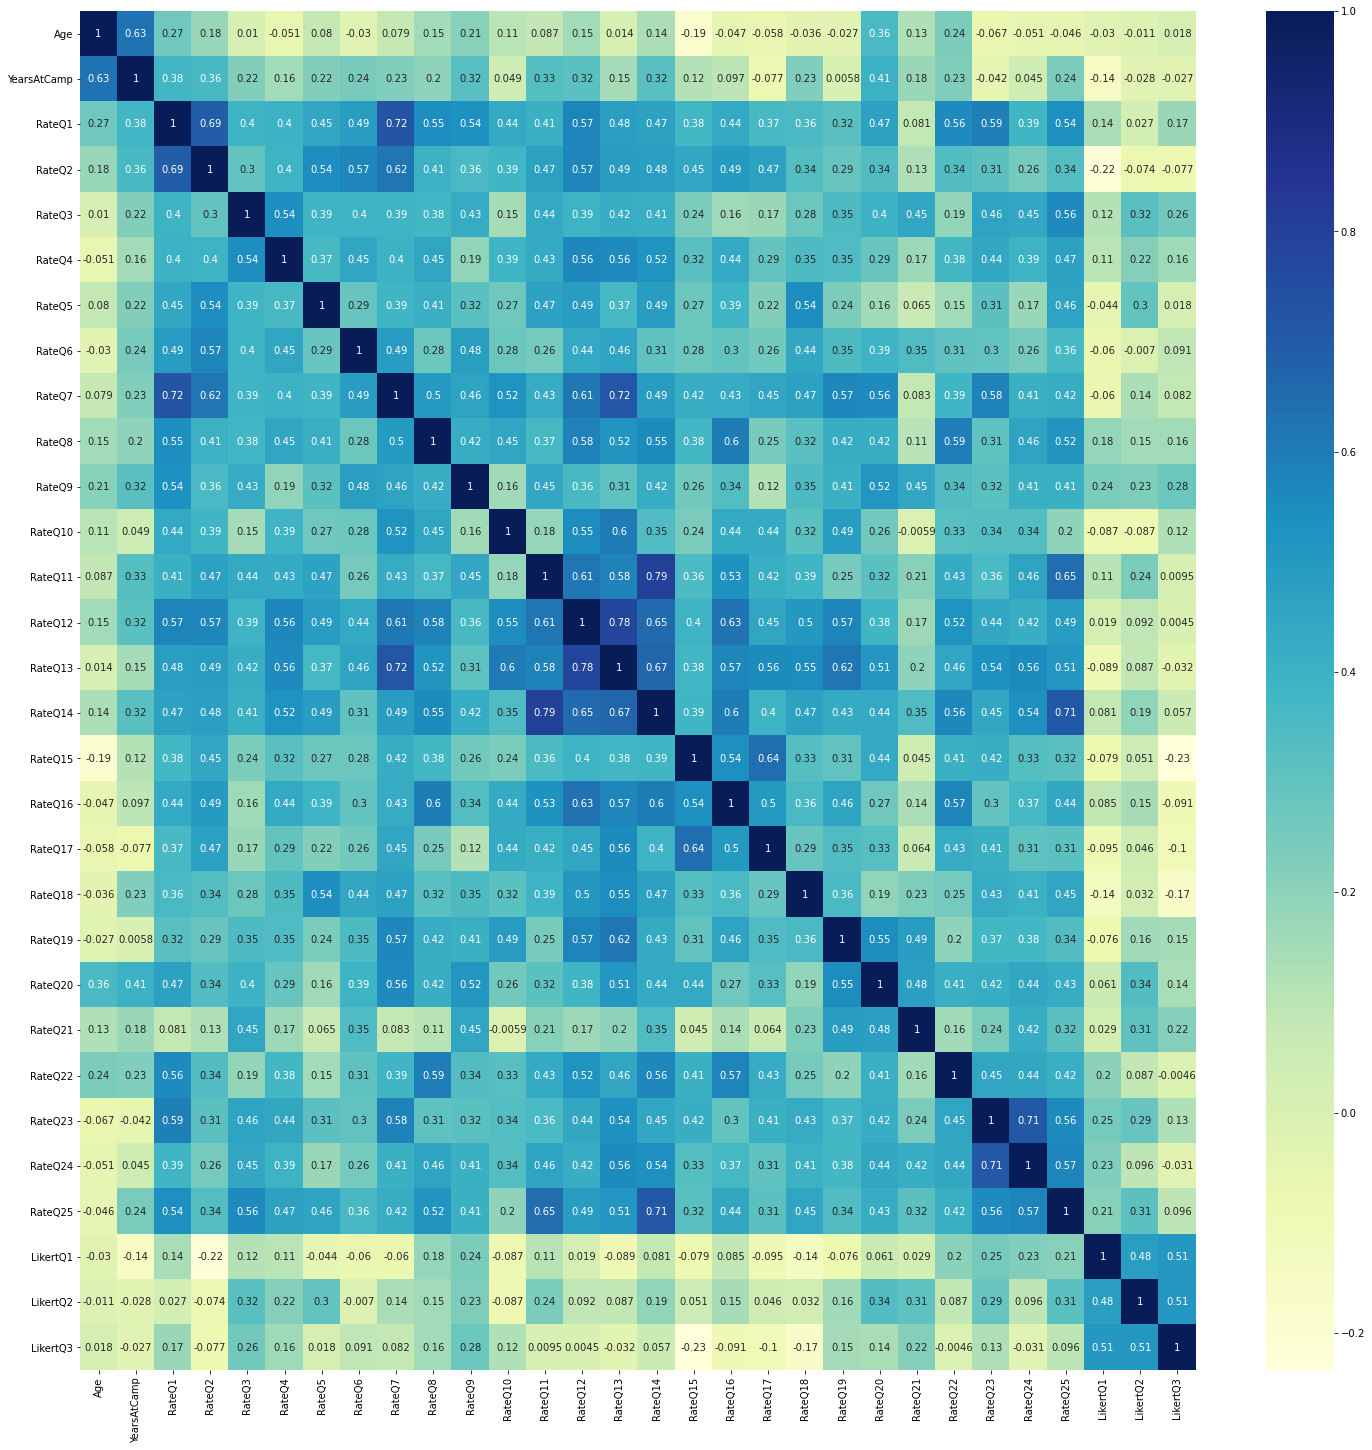

In [24]:
# Correlation matrix
corr = data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

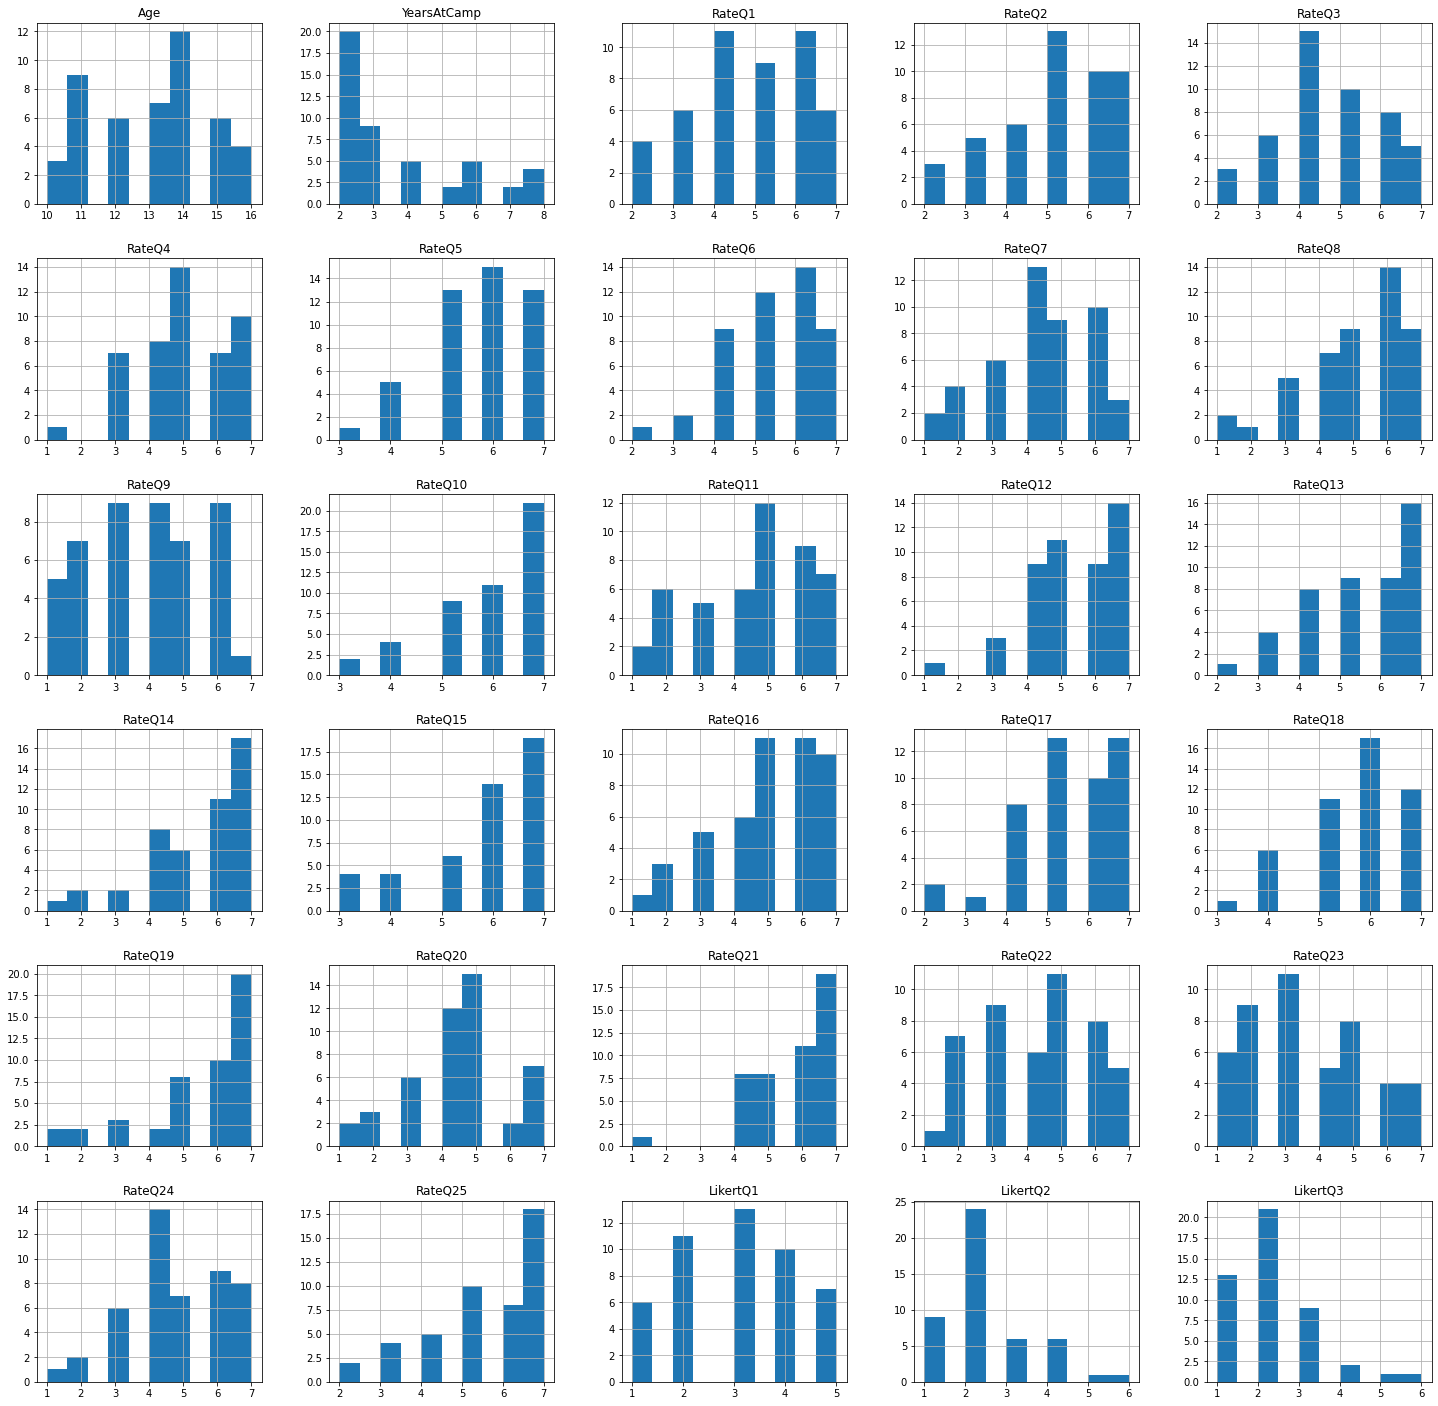

In [25]:
# Distribution of numerical variables
data.hist(bins=10, figsize=(25,25))
plt.show()


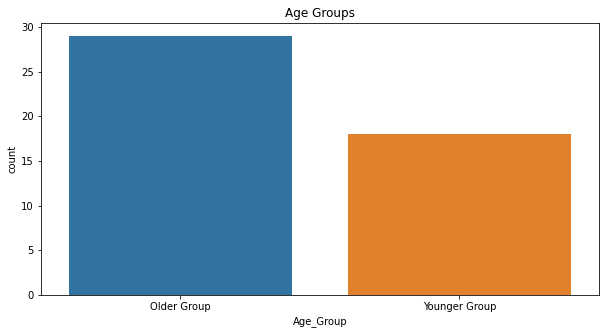

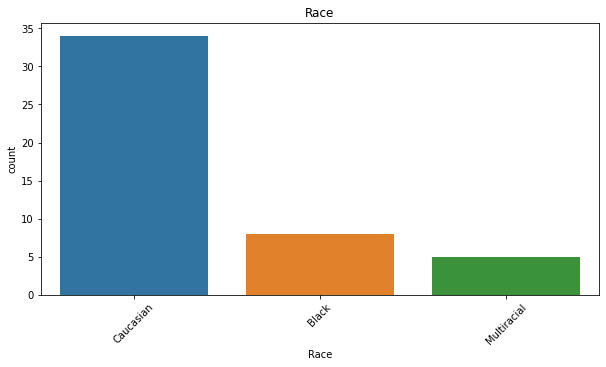

In [26]:
# Bar plots of categorical variables
plt.figure(figsize=(10,5))
sns.countplot(data['Age_Group'])
plt.title('Age Groups')
plt.show()

race_counts = data['Race'].value_counts(ascending=False)
race_order = race_counts.index

plt.figure(figsize=(10,5))
sns.countplot(data['Race'], order=race_order)
plt.title('Race')
plt.xticks(rotation=45)
plt.show()